Instructions
Install the necessary packages
Import you data and perform basic data exploration phase
Display general information about the dataset
Create a pandas profiling reports to gain insights into the dataset
Handle Missing and corrupted values
Remove duplicates, if they exist
Handle outliers, if they exist
Encode categorical features
Based on the previous data exploration train and test a machine learning classifier
Create a streamlit application (locally)
Add input fields for your features and a validation button at the end of the form
Import your ML model into the streamlit application and start making predictions given the provided features values

Note: 

This checkpoint should be done locally, (Google colab notebooks won't work)
Make sure to run the app using the "streamlit run" command in your terminal.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('Expresso_churn_dataset (1).csv')

data.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [9]:
data.value_counts()

user_id                                   REGION       TENURE        MONTANT  FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  ON_NET  ORANGE  TIGO   ZONE1  ZONE2  MRG  REGULARITY  TOP_PACK                        FREQ_TOP_PACK  CHURN
00000bfd7d50f01092811bc0c8d7b0d6fe7c3596  FATICK       K > 24 month  4250.0   15.0            4251.0   1417.0        17.0       4.0          388.0   46.0    1.0    1.0    2.0    NO   54          On net 200F=Unlimited _call24H  8.0            0        1
ac1e12277e4704e57a893f787f1112a900109e97  KAFFRINE     K > 24 month  3050.0   19.0            2551.0   850.0         23.0       0.0          38.0    25.0    1.0    8.0    0.0    NO   60          Mixt 250F=Unlimited_call24H     6.0            0        1
abf6440b88ee65a9a9b7685ef565bf317e857550  DAKAR        K > 24 month  5500.0   11.0            5989.0   1996.0        26.0       7073.0       44.0    7.0     6.0    1.0    2.0    NO   62          VAS(IVR_Radio_Daily)            14.0           0   

In [7]:
data.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,1.397309e+06,1.397309e+06,1.428000e+06,1.428000e+06,1.428000e+06,1.093615e+06,1.367373e+06,1.258800e+06,864032.000000,169721.000000,136824.000000,2.154048e+06,1.251454e+06,2.154048e+06
mean,5.532117e+03,1.152912e+01,5.510810e+03,1.836943e+03,1.397814e+01,3.366450e+03,2.776891e+02,9.541871e+01,23.109253,8.170132,7.553309,2.804251e+01,9.272461e+00,1.875474e-01
std,7.111339e+03,1.327407e+01,7.187113e+03,2.395700e+03,1.469403e+01,1.330446e+04,8.726889e+02,2.049873e+02,63.578086,41.169511,33.487234,2.228686e+01,1.228044e+01,3.903504e-01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000,0.000000,0.000000,6.000000e+00,2.000000e+00,0.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.570000e+02,2.700000e+01,2.900000e+01,6.000000,1.000000,2.000000,2.400000e+01,5.000000e+00,0.000000e+00
75%,7.350000e+03,1.600000e+01,7.368000e+03,2.456000e+03,2.000000e+01,2.895000e+03,1.560000e+02,9.900000e+01,20.000000,3.000000,5.000000,5.100000e+01,1.200000e+01,0.000000e+00
max,4.700000e+05,1.330000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4174.000000,4792.000000,3697.000000,6.200000e+01,7.130000e+02,1.000000e+00


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [8]:
data.isnull().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [9]:
data.CHURN.value_counts()

0    1750062
1     403986
Name: CHURN, dtype: int64

In [10]:
# Create a function that cleans the dataset
def cleaner(dataframe):

    # Drop all the columns that looses above 50% of its values
    for i in dataframe.columns:
        if ((dataframe[i].isnull().sum() / len(dataframe[i])) * 100) > 50:
            dataframe.drop(i, axis = 1, inplace = True)

    # Replace the missing value of all categorical columns with mode
        elif dataframe[i].dtypes == 'O':
            dataframe[i].fillna(dataframe[i].mode()[0], inplace = True)

    # Replace the missing of all numerical values with median
        elif dataframe[i].dtypes == 'float' or dataframe[i].dtypes == 'int':
            dataframe[i].fillna(dataframe[i].median(), inplace = True)

    return dataframe

cleaner(data)
data.isnull().sum()

In [ ]:
data.drop(['user_id'], axis=1, inplace=True)

In [10]:
data.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [11]:
cat = data.select_dtypes(include = ['category', 'object'])
num = data.select_dtypes(include = 'number')
display(cat.head())
display(num.head())

,user_id,REGION,TENURE,MRG,TOP_PACK
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,NO,On net 200F=Unlimited _call24H
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NO,NaN
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,NO,On-net 1000F=10MilF;10d
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,NO,"Data:1000F=5GB,7d"
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,NO,Mixt 250F=Unlimited_call24H


,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
0,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,54,8.0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,1
2,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,17,1.0,0
3,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,62,11.0,0
4,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,11,2.0,0


In [ ]:
# %pip install pandas pandas-profiling
# import pandas_profiling as pp
# ppr = pp.ProfileReport(data, title='Pandas Profiling Report')
# ppr

In [ ]:
# import pandas as pd
# from pandas_profiling import ProfileReport

# # # Load your dataset
# # df = pd.read_csv('your_data.csv')

# # Create a profile report
# profile = ProfileReport(data)
# profile = ProfileReport(data, title='Pandas Profiling Report')




In [12]:
def outlierRemoval(dataframe):
    for i in dataframe.columns:
        lowerQuartile = dataframe[i].describe()[4]
        upperQuartile = dataframe[i].describe()[6]
        IQR = upperQuartile - lowerQuartile
        lowerIQR = lowerQuartile- 1.5 * IQR
        upperIQR = upperQuartile + 1.5 * IQR
        dataframe = dataframe.loc[(dataframe[i] >= lowerIQR) & (dataframe[i] <= upperIQR)]
    return dataframe
data.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
lb = LabelEncoder()
scaler = StandardScaler()

def transformer(dataframe):
    # scale the numerical columns
    for i in dataframe.drop('CHURN', axis = 1).columns: # ---------------------------------------------- Iterate through the dataframe columns
        if i in dataframe.select_dtypes(include = 'number').columns: # --------- Select only the numerical columns
            dataframe[[i]] = scaler.fit_transform(dataframe[[i]]) # ------------ Scale all the numericals

    # label encode the categorical columns
    for i in dataframe.drop('CHURN', axis = 1).columns:  # --------------------------------------------- Iterate through the dataframe columns
        if i in dataframe.select_dtypes(include = ['object', 'category']).columns: #-- Select all categorical columns
            dataframe[i] = lb.fit_transform(dataframe[i]) # -------------------- Label encode selected categorical columns
    return dataframe

transformer(data)
data.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,0,2,7,-0.180292,0.261478,-0.175287,-0.175290,0.205652,-0.252731,0.126403,-0.241082,-0.347750,-0.174162,-0.165834,0,1.164700,107,-0.103617,0
1,1,14,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,-1.078775,140,NaN,1
2,2,14,7,-0.271695,-0.717875,-0.624842,-0.624846,-0.815171,NaN,-0.215070,-0.241082,-0.253378,NaN,NaN,0,-0.495472,108,-0.673629,0
3,3,0,7,1.120448,0.261478,1.111878,1.112017,0.273707,3.039399,-0.271218,0.032106,-0.332021,NaN,NaN,0,1.523656,35,0.140674,0
4,4,0,7,-0.637309,-0.793210,-0.629712,-0.629855,-0.883225,NaN,-0.273510,-0.348406,NaN,NaN,NaN,0,-0.764689,100,-0.592199,0


In [15]:
data.CHURN.value_counts()

0    1750062
1     403986
Name: CHURN, dtype: int64

In [ ]:
# Split into Train Test data
from sklearn.model_selection import train_test_split
x = data.drop('CHURN', axis = 1)
y = data['CHURN']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 40, stratify = y)

In [ ]:
# ANOVA F-value between label/feature

x = data.drop('CHURN', axis = 1) # --------------------------------- Define the Independent Variables
y = data.CHURN # --------------------------------------------------- Define the dependent Variable

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
best_feature1 = SelectKBest(score_func = f_classif, k = 'all')
fitting1 = best_feature1.fit(x,y)
scores1 = pd.DataFrame(fitting1.scores_)
columns1 = pd.DataFrame(x.columns)
feat_score1 = pd.concat([columns1, scores1], axis = 1)
feat_score1.columns = ['Feature', 'F_classif_score']
k1 = feat_score1.nlargest(11, 'F_classif_score')

k1.sort_values(by = 'F_classif_score', ascending = False)

,Feature,F_classif_score
11,REGULARITY,644840.329412
0,REGION,186773.909044
12,TOP_PACK,144281.605808
6,FREQUENCE,54477.091391
3,FREQUENCE_RECH,49118.611236
5,ARPU_SEGMENT,48283.516052
4,REVENUE,48282.919802
2,MONTANT,46316.719297
13,FREQ_TOP_PACK,36745.706515
9,ORANGE,29028.028224


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

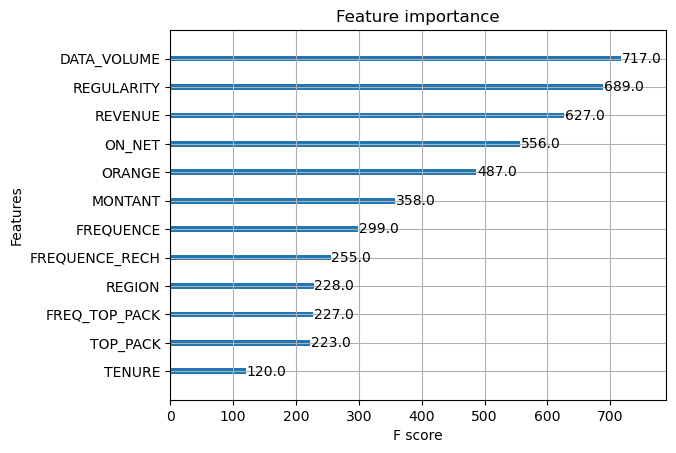

In [ ]:
# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model)

In [ ]:
sel_cols = ['REGULARITY', 'REVENUE', 'FREQUENCE_RECH', 'FREQUENCE', 'REGION', 'TOP_PACK']

x = data[sel_cols]
y = data.CHURN

In [ ]:
x.head()

,REGULARITY,REVENUE,FREQUENCE_RECH,FREQUENCE,REGION,TOP_PACK
0,1.164700,-0.069254,0.464083,0.385443,2,107
1,-1.078775,-0.278767,-0.269354,-0.270658,0,18
2,-0.495472,-0.610372,-0.727753,-0.844746,0,108
3,1.523656,1.480077,0.464083,0.467455,0,35
4,-0.764689,-0.616234,-0.819433,-0.926758,0,100


In [ ]:
# ----------- Splitting Into Train and Test ---------------
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, stratify = y)
print(f"xtrain size = {xtrain.shape}")
print(f"xtest size = {xtest.shape}")
print(f"ytrain size = {ytrain.shape}")
print(f"ytest size = {ytest.shape}")

xtrain size = (1723238, 6)
xtest size = (430810, 6)
ytrain size = (1723238,)
ytest size = (430810,)


              precision    recall  f1-score   support

           0       0.91      0.92      0.92   1385918
           1       0.67      0.64      0.65    337320

    accuracy                           0.87   1723238
   macro avg       0.79      0.78      0.79   1723238
weighted avg       0.87      0.87      0.87   1723238



<Axes: >

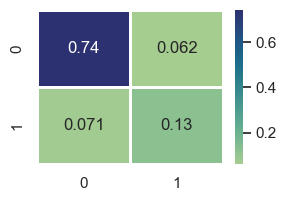

In [ ]:
# ------------- MODELLING ------------------
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np


logistics = LogisticRegression()
logistics.fit(xtrain, ytrain)
train_pred = logistics.predict(xtrain)
print(classification_report(train_pred, ytrain))


revealer = confusion_matrix(train_pred, ytrain)
plt.figure(figsize = (3,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=1)

In [ ]:
import joblib
joblib.dump(logistics, 'Expresso_Churn.pkl')

['Expresso_Churn.pkl']

              precision    recall  f1-score   support

           0       0.91      0.92      0.92    346530
           1       0.67      0.64      0.65     84280

    accuracy                           0.87    430810
   macro avg       0.79      0.78      0.79    430810
weighted avg       0.87      0.87      0.87    430810



<Axes: >

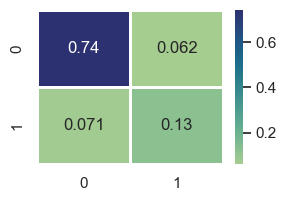

In [ ]:
# Since it performs well on the train set, we go ahead to test the model on new dataset
 
test_pred = logistics.predict(xtest)
print(classification_report(test_pred, ytest))

revealer = confusion_matrix(test_pred, ytest)
plt.figure(figsize = (3,2))
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', linewidth=1)